In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from geopandas.tools import sjoin
from shapely.geometry import Point, mapping,shape

In [2]:
mhincome = pd.read_csv('ACS_14_5YR_S1903_with_ann.csv', skiprows=[0])

In [3]:
mhincome.columns

Index([u'Id', u'Id2', u'Geography', u'Total; Estimate; Households',
       u'Total; Margin of Error; Households',
       u'Median income (dollars); Estimate; Households',
       u'Median income (dollars); Margin of Error; Households',
       u'Total; Estimate; Households - One race-- - White',
       u'Total; Margin of Error; Households - One race-- - White',
       u'Median income (dollars); Estimate; Households - One race-- - White', 
       ...
       u'Median income (dollars); Estimate; PERCENT IMPUTED - Household income in the past 12 months',
       u'Median income (dollars); Margin of Error; PERCENT IMPUTED - Household income in the past 12 months',
       u'Total; Estimate; PERCENT IMPUTED - Family income in the past 12 months',
       u'Total; Margin of Error; PERCENT IMPUTED - Family income in the past 12 months',
       u'Median income (dollars); Estimate; PERCENT IMPUTED - Family income in the past 12 months',
       u'Median income (dollars); Margin of Error; PERCENT IMPUT

In [4]:
len(mhincome)

2167

In [5]:
mhincome = mhincome[['Id2','Total; Estimate; Households', 'Median income (dollars); Estimate; Households']]

In [6]:
mhincome.columns = [['BoroCT2010', 'Total Households', 'Median Income']]

In [7]:
mhincome['BoroCT2010'] = mhincome['BoroCT2010'].map(lambda x: str(x)[3:])

In [8]:
mhincome['Borocode'] = mhincome['BoroCT2010'].str[:2]

In [9]:
mhincome['Median Income'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [10]:
mhincome['Median Income'] = mhincome['Median Income'].replace('', 'NaN')

In [11]:
mhincome['Median Income'] = mhincome['Median Income'].astype(float)

In [12]:
mhincome['Total Households'] = mhincome['Total Households'].astype(float)

In [13]:
bcorr = {'05': '2', '47': '3', '61' : '1', '81': '4', '85' : '5'}

In [14]:
mhincome['Borocode2'] = mhincome['Borocode'].map(bcorr)

In [15]:
mhincome['BoroCT2010'] = mhincome['BoroCT2010'].map(lambda x: str(x)[2:])

In [16]:
mhincome['BoroCT2010'] = mhincome.Borocode2 + mhincome.BoroCT2010.astype(str)

In [17]:
tracts = gpd.GeoDataFrame.from_file('New Shapefile/NYC Tracts WGS84.shp')

In [18]:
tracts.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2497009.69813,7729.016794,POLYGON ((-74.07920577013246 40.64343078374567...
1,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4954936.20677,10582.855371,POLYGON ((-74.11618948681574 40.62894119692049...
2,5007400,5,Staten Island,I,007400,74,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5788237.74119,9902.948235,"POLYGON ((-74.05974734759452 40.5938486115672,..."
3,1003200,1,Manhattan,I,003200,32,MN22,East Village,3809,2334190.23228,6358.386684,POLYGON ((-73.97990650235906 40.72686577300235...
4,1009600,1,Manhattan,E,009600,96,MN17,Midtown-Midtown South,3807,1887288.40108,5737.356247,POLYGON ((-73.97765482727571 40.75791142377998...


In [19]:
geomhincome = pd.merge(tracts, mhincome, on='BoroCT2010')

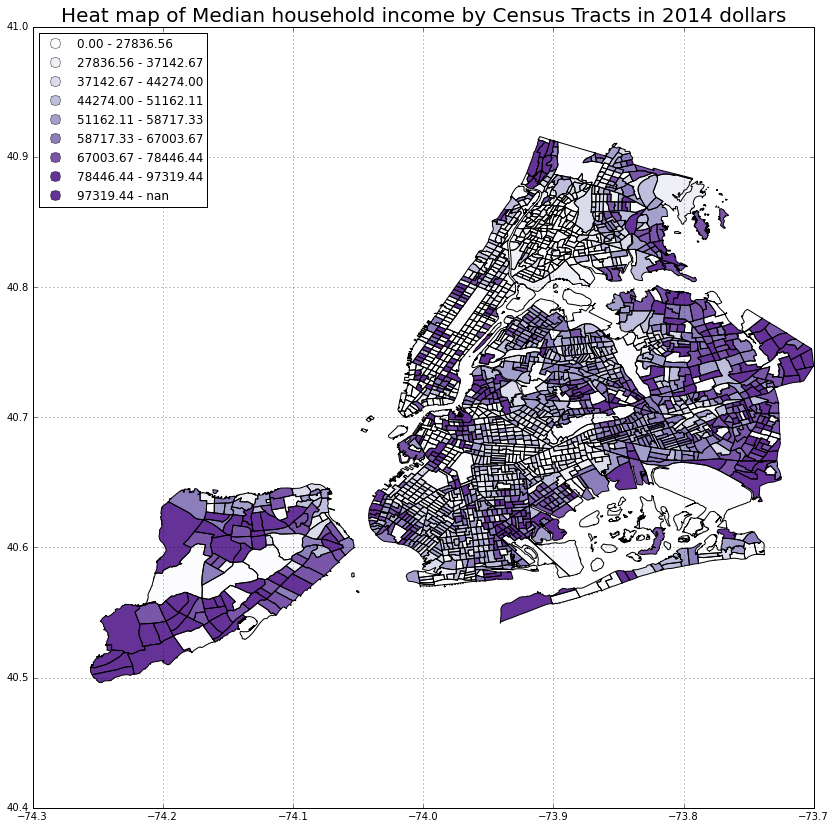

In [20]:
plt.figure()
geomhincome.plot(column='Median Income', scheme='Quantiles', k=9, colormap = 'Purples', alpha=0.8, figsize = (14,25), legend=True)
plt.title("Heat map of Median household income by Census Tracts in 2014 dollars", fontsize=20)
plt.grid()